# Tasks 2020
Task submissions for October - December 2020
***


### Task 1
Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values
*** 
* For this task I write a function `counts` which takes a list as an argument [1]
* Within `counts` I create an empty dictionary `d`
* Next I use a `for` loop to iterate over the list, adding a list-item to the dictionary on each iteration
* Within the `for` loop I use conditional statements to determine whether a new key-value pair should be added to the dictionary. If the key exists already, its corresponding value increases by 1
* When the `for` loop ends, the dictionary containing the list items is returned
* Finally, I call the function and print the returned dictionary to the console



[1] How to add list elements into dictionary https://stackoverflow.com/questions/30208044/how-to-add-list-elements-into-dictionary

In [1]:
# sample list as suggested in task question
l = ['A', 'A', 'B', 'C', 'A']

In [2]:
# counts() function takes a list as an argument and adds list items to dictionary
def counts(lst):
    # empy dictionary d initialised 
    d = {}
    # iterate through list items and add to dict d
    for item in lst:
        if item in d:
            d[item] += 1
        else:
            d[item] = 1
    return d

In [3]:
# call function and print to console
print(counts(l))

{'A': 3, 'B': 1, 'C': 1}


### Task 2
Write a Python function calleddicerollsthat simulatesrolling dice.  Your function should take two parameters:  the number of dicekandthe number of times to roll the dicen.  The function should simulate randomlyrollingkdicentimes, keeping track of each total face value.  It should then returna dictionary with the number of times each possible total face value occurred.  So,calling the function asdiceroll(k=2, n=1000)should return a dictionary like:{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}You can use any module from the Python standard library you wish and you shouldinclude a description with references of your algorithm in the notebook.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rng = np.random.default_rng()

dice1 = rng.integers(1, 7)
dice2 = rng.integers(1, 7)
dice1 + dice2

5

In [6]:
l = []
n = 5
i = 0
for i in range(0, n):
    dice3 = rng.integers(1, 7)
    l.append(dice3)
    i += 1
print(l)


[2, 4, 6, 6, 3]


In [21]:
def dicerolls(n):
    l = []
    for i in range(n):
        dice1 = rng.integers(1, 7)
        dice2 = rng.integers(1, 7)
        ans = dice1 + dice2
        l.append(ans)
        i += 1
    return l

In [25]:
result = dicerolls(10000)

In [31]:
dick = (counts(result))
dick_items = dick.items()
sorted_dick = sorted(dick_items)
print(sorted_dick)

[(2, 312), (3, 587), (4, 836), (5, 1068), (6, 1386), (7, 1680), (8, 1363), (9, 1118), (10, 846), (11, 528), (12, 276)]


(array([ 312.,  587.,  836., 1068., 1386., 1680., 1363., 1118.,  846.,
         528.,  276.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <a list of 11 Patch objects>)

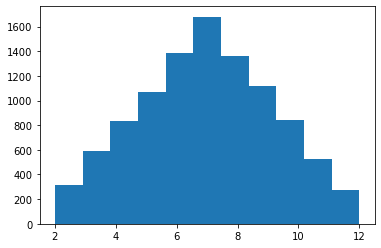

In [30]:
plt.hist(result, bins=11)